In [1]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25))

In [32]:
def getdata(term):
	kw_list = [term]
	pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
	df = pytrends.interest_over_time()
	return df

In [4]:
def plotdata(term):
    df = getdata(term)
    df.plot()

In [5]:
stocks = pd.read_csv("~/desktop/daily_stocks.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
newstocks = stocks[stocks['date']>20150000] # Restrict to data after 2015

In [7]:
newstocks.head()

,PERMNO,date,TICKER,BIDLO,ASKHI,PRC,BID,ASK,OPENPRC,RETX
2014,10026,20150102,JJSF,106.810,109.446,107.69,107.45,107.69,109.18,-0.009929
2015,10026,20150105,JJSF,106.760,108.430,107.24,107.25,107.39,107.41,-0.004179
2016,10026,20150106,JJSF,106.185,108.690,107.27,107.25,107.55,107.84,0.000280
2017,10026,20150107,JJSF,106.495,108.770,108.73,108.62,108.75,107.70,0.013611
2018,10026,20150108,JJSF,109.110,111.280,110.32,110.31,110.71,109.48,0.014623


In [8]:
def find_date_string(row):
    ds = str(row['date']-1)
    dates = ds[:4] + "-" + ds[4:6] + "-" + ds[6:]
    return dates

In [62]:
def getdf(searches, ticker):
    df = newstocks[newstocks["TICKER"]==ticker]
    df['date_string'] = df.apply(lambda row: find_date_string(row), axis=1)
    trends_data = getdata(searches[0])
    for i in range(1, len(searches)):
        s = searches[i]
        newtrends = getdata(s)
        trends_data = trends_data.join(newtrends, rsuffix='_'+s)
    s = set(trends_data.index.values)
    s = set([str(x)[:10] for x in s])
    df = df[df['date_string'].isin(s)]
    df.plot(y='BID')
    for s in searches:
        df[s] = df.apply(lambda row: trends_data.loc[row['date_string']][s], axis=1)
        df.plot(y=s)
    print(df)
    return df

In [65]:
from sklearn.linear_model import LinearRegression

In [77]:
def easy(ticker):
    features = ["buy " + ticker, "sell " + ticker, ticker]
    data = getdf(features, ticker)
    X = pd.DataFrame(data, columns=features)
    y = data['BID']
    lm = LinearRegression()
    model = lm.fit(X,y)
    print(lm.score(X,y))
    

In [ ]:
easy("GOOGL")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


            buy GOOGL isPartial
date                           
2014-12-07         71     False
2014-12-14        100     False
2014-12-21         48     False
2014-12-28         51     False
2015-01-04         38     False
...               ...       ...
2019-10-27         31     False
2019-11-03         17     False
2019-11-10         25     False
2019-11-17         21     False
2019-11-24         22      True

[260 rows x 2 columns]
            buy GOOGL isPartial
date                           
2014-12-07         71     False
2014-12-14        100     False
2014-12-21         48     False
2014-12-28         51     False
2015-01-04         38     False
...               ...       ...
2019-10-27         31     False
2019-11-03         17     False
2019-11-10         25     False
2019-11-17         21     False
2019-11-24         22      True

[260 rows x 2 columns]


TypeError: getdf() missing 1 required positional argument: 'ticker'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PERMNO,date,TICKER,BIDLO,ASKHI,PRC,BID,ASK,OPENPRC,RETX,date_string,trends
10607559,93436,20150105,TSLA,207.16260,216.50000,210.09000,210.00999,210.10001,214.55000,-0.042041,2015-01-04,9
10607564,93436,20150112,TSLA,199.25000,204.47000,202.21001,202.19000,202.21001,203.05000,-0.021533,2015-01-11,14
10607573,93436,20150126,TSLA,201.05000,208.62000,206.55000,206.53999,206.59000,201.83000,0.026132,2015-01-25,10
10607578,93436,20150202,TSLA,203.30000,211.94991,210.94000,210.92999,211.05000,203.97000,0.036051,2015-02-01,11
10607583,93436,20150209,TSLA,211.99001,217.92999,217.48000,217.44000,217.49001,215.38000,0.000552,2015-02-08,23
...,...,...,...,...,...,...,...,...,...,...,...,...
10608545,93436,20181203,TSLA,352.00000,366.00000,358.48999,358.48999,358.63000,360.00000,0.022854,2018-12-02,27
10608549,93436,20181210,TSLA,353.12000,365.98001,365.14999,365.14001,365.14999,360.00000,0.020072,2018-12-09,28
10608554,93436,20181217,TSLA,343.88000,365.70001,348.42001,348.35999,348.42001,362.00000,-0.047278,2018-12-16,25
10608559,93436,20181224,TSLA,295.19501,314.50000,295.39001,295.45999,295.67001,313.50000,-0.076242,2018-12-23,25


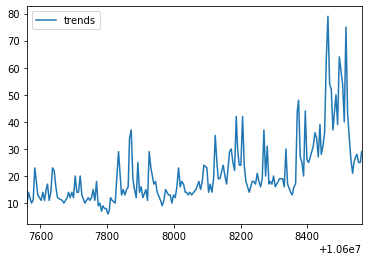

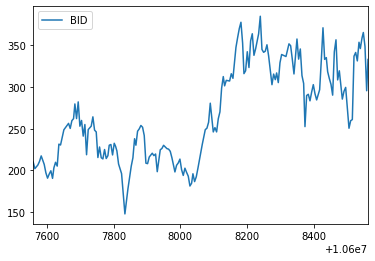

In [149]:
getdf("TSLA")

In [38]:
d = getdata('MSFT')

,MSFT,isPartial
date,,
2014-12-07,18,False
2014-12-14,18,False
2014-12-21,15,False
2014-12-28,14,False
2015-01-04,16,False
...,...,...
2019-10-27,74,False
2019-11-03,52,False
2019-11-10,55,False
